# MULTI-CLASS CLASSIFICATION WITH EARTHQUAKE DATA



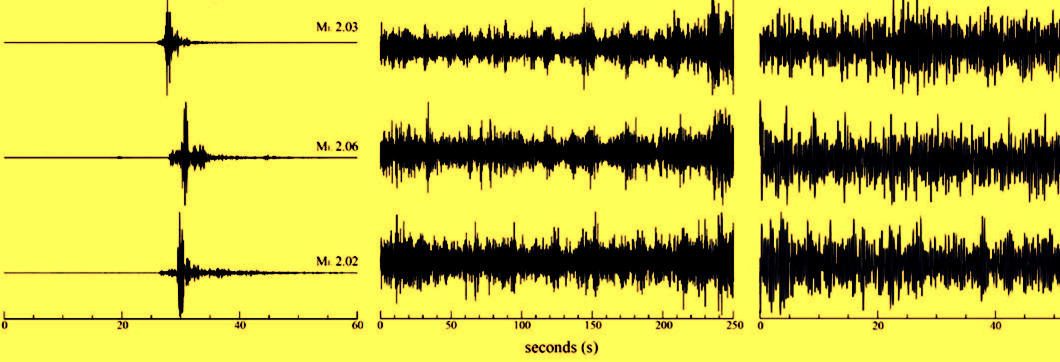

In [1]:
from IPython.display import Image
Image("multi-class_earthquake.jpg")

> Proyect based on [g2net 2020 Hackathon](https://indico.ego-gw.it/event/46/overview), with collaboration of [A. Mendez](https://www.linkedin.com/in/aimendezl/)
>
> Data used can be found [here](https://www.kaggle.com/zerafachris/g2net-training-school-hackaton)

In [2]:
# import used:
# numpy, pandas and matplotlib imported with 'Plotter.py'
from Plotter import*
from pandas_profiling import ProfileReport

# I.  Explore the data

In [3]:
# When loading be sure to define the compression
df_train = pd.read_pickle('df_train.pkl.gzip', compression='gzip')

print('Rows and Columns: {}'.format(df_train.shape))

df_train.head()

Rows and Columns: (12308, 19)


label  target trace_id  receiver_latitude  receiver_longitude  \
1   Near_Small       1  trace_1          33.598182         -116.596005   
2   Far_Medium       5  trace_2          33.655160         -115.990060   
4  Near_Medium       2  trace_4          19.333395         -155.385650   
5    Far_Small       4  trace_5          35.935700         -117.601700   
6        Noise       0  trace_6          64.564600         -165.373200   

   receiver_elevation_m  p_arrival_sample  p_travel_sec  s_arrival_sample  \
1                1374.8             500.0       7.39588            1833.0   
2                 538.0             800.0       8.64000            2055.2   
4                 836.0             900.0       7.77000            1401.0   
5                1042.6             800.0       2.68000            1416.0   
6                 338.0             697.2       1.41000             674.0   

       source_origin_time  source_latitude  source_longitude  source_depth_km  \
1 2017-10-12 02:55:02.969        35.561667         -116.5697            13.92   
2 2012-05-29 21:39:41.030        69.509000         -116.3350             5.56   
4 2018-04-23 03:03:17.385        33.075200           73.6821             9.41   
5 2013-03-11 16:56:06.060        38.612300         -122.6970           118.79   
6 2018-01-05 13:16:17.060        60.036800         -155.2055             2.17   

    snr_db_E   snr_db_N   snr_db_Z  \
1  39.799999  41.599998  39.500000   
2  22.900000  28.299999  22.299999   
4  12.600000  22.000000  18.299999   
5  30.600000  29.100000  33.000000   
6  47.099998  18.100000  49.400002   

                                                   E  \
1  [0.0, 3.884492e-05, 0.00037855064, 0.002025907...   
2  [-0.0, 0.007055464, 0.02053014, -0.08816139, -...   
4  [0.0, 0.00087343936, 0.001654511, 0.003251037,...   
5  [-0.0, -0.00044424256, -0.00061723316, -0.0027...   
6  [-0.0, -0.0059266915, -0.01604839, -0.04224359...   

                                                   N  \
1  [-0.0, -0.00013965365, 0.00040082424, -0.00251...   
2  [0.0, 0.0045861118, -0.013594023, -0.06492513,...   
4  [-0.0, -0.0024113357, -0.0057321144, -0.017913...   
5  [0.0, 2.6028414e-05, -0.00040918458, 0.0047532...   
6  [-0.0, -0.0059266915, -0.01604839, -0.04224359...   

                                                   Z  
1  [0.0, 0.00020642515, -0.00026392427, 0.0005670...  
2  [0.0, 0.010553602, 0.04499443, 0.07075505, -0....  
4  [-0.0, -0.00079455395, -0.0040257163, -0.01145...  
5  [0.0, 0.00034063237, 0.0003412804, 0.000484175...  
6  [-0.0, -0.0059266915, -0.01604839, -0.04224359...

#### <font color='darkred'>The columns of this data frame are:</font>

______________________________________________________________________________________________________________

**label** : Text label describing the event.

**target**:  Categorical label describing the event.

**trace_id**: Id to identify the event in the database.

**receiver_latitude**: Latitude location of the receiver.

**receiver_longitude**: Longitudinal location of the receiver.

**receiver_elevation_m**:  Elevalation in metres from see level for the receiver.

**p_arrival_sample**: Predicted p-wave arrival. Not applicable to Noise.

**p_travel_sec**: Time taken by the p-wave to travel from the source origin to the receiver location. Not applicable to Noise.

**s_arrival_sample**: Predicted s-wave arrival. Not applicable to Noise.

**source_origin_time**: Datetime for the event source.

**source_latitude**: Event source latitude.

**source_longitude**: Event source longitude.

**source_depth_km**: Event source depth.

**snr_db_E**: Signal to noise ratio for the E-component of the [seismogram](https://en.wikipedia.org/wiki/Seismogram") trace.

**snr_db_N**: Signal to noise ratio for the N-component of the seismogram trace.

**snr_db_Z**: Signal to noise ratio for the Z-component of the seismogram trace.

**E**: E-component of the seismogram trace.

**N**: N-component of the seismogram trace.

**Z**: Z-component of the seismogram trace.


<font color='darkred'>There are 7 different classes: six different types of earthquakes and the noise</font>

In [4]:
df_train[['target','label']].drop_duplicates().sort_values(by='target')

target        label
6        0        Noise
1        1   Near_Small
4        2  Near_Medium
18       3   Near_Large
5        4    Far_Small
2        5   Far_Medium
7        6    Far_Large

In [5]:
# A full report of this dataset can be obtained with the Pandas profiling module
profile = ProfileReport( df_train.drop(['E','N','Z'], axis=1))
profile

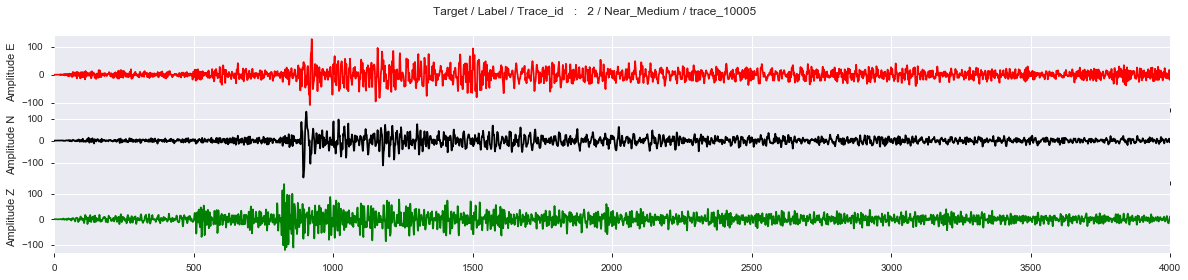

label : Near_Medium
target : 2
trace_id : trace_10005
receiver_latitude : 36.171
receiver_longitude : -89.50200000000001
receiver_elevation_m : 80.0
p_arrival_sample : 900.0
p_travel_sec : 8.050000190734862
s_arrival_sample : 1475.2
source_origin_time : 2013-06-16 01:13:08.452000
source_latitude : 53.1447
source_longitude : -147.561
source_depth_km : 113.05
snr_db_E : 13.5
snr_db_N : 20.70000076
snr_db_Z : 14.0


In [6]:
# We can also visualize some of the traces
# look for different traces by doing df_train.groupby('target')['trace_id'].min() or .max()
trace= 'trace_10005'
plot_trace(trace)

In [7]:
from keras.utils import to_categorical
from keras.layers import Conv1D, Dense, Dropout, Input, Concatenate, MaxPooling1D, Flatten, Reshape
from keras.layers.merge import concatenate
from keras.models import Model
from keras.utils.vis_utils import plot_model
from keras.optimizers import Adam
from scipy import stats


Using TensorFlow backend.


# II. Merged Model

First we will define a model that trains separately the numerical component and the time series and then merges the two of them

In [8]:
def model1():
    n_filters = 15
    kernel_size = 5
    #head 1 : time series
    input1 = Input(shape=(6000, 3) )
    convolved = Conv1D( n_filters, kernel_size,  activation="sigmoid")(input1)
    convolved = Conv1D( n_filters, kernel_size,  activation="sigmoid")(convolved)
    drop = Dropout(0.4)(convolved)
    processed = MaxPooling1D(pool_size=50)(drop)
    flat = Flatten()(processed)
    dense = Dense(7, activation='softmax')(flat)
    reshape = Reshape((1,-1))(dense)
    model1 = Model(inputs = input1, outputs=reshape) 
    return model1
    
def model2():
    #head 2 : numerical variables
    input2 = Input(shape= (1,6))
    x = Dense(150,activation='sigmoid')(input2)
    x = Dense(50,activation='sigmoid')(x)
    x = Dense(7, activation='softmax')(x)
    model2 = Model(inputs = input2, outputs=x)
    return model2
    

def merged_model():
    model_1 = model1()
    model_2 = model2()
    merged = concatenate( [model_1.output, model_2.output] )
    compressed = Dense(100, activation="relu")(merged)
    output = Dense(7, activation='softmax')(compressed) 
    
    model = Model(inputs=[model_1.input, model_2.input], outputs=output)                   
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'] )
    
    return model
  

In [9]:
model = merged_model()

Let's have a look at this model

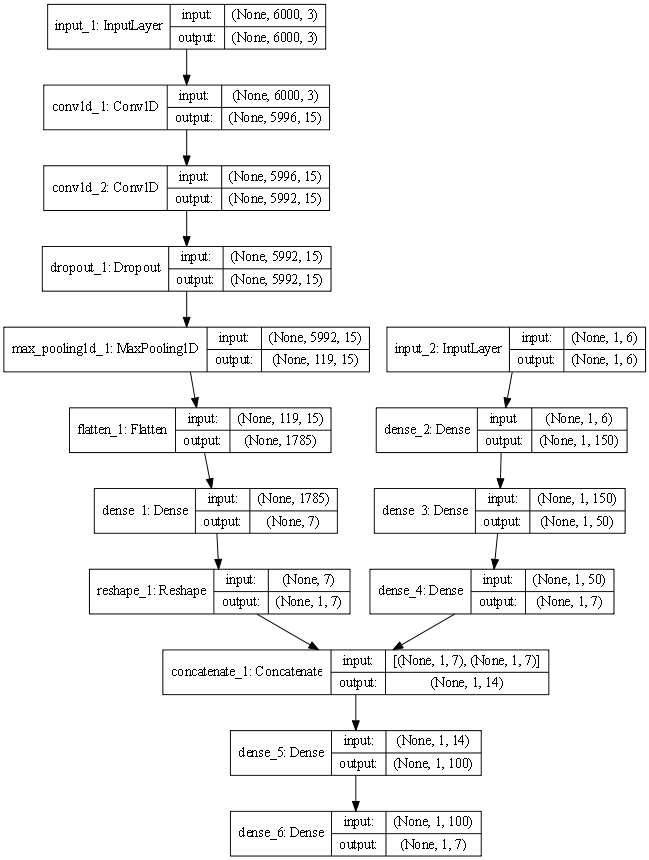

In [10]:
plot_model(model, dpi=70,show_shapes=True)

#### Feature Selection and Preprocessing:

In [11]:
# training data:

df_sequential = df_train[["E" , "N", "Z"]].to_numpy()
X1_train = np.array([ np.stack(item).T for item in df_sequential ])
print('X1_train shape: ', X1_train.shape)

df_numerical = df_train[[ 'receiver_latitude', 'receiver_longitude', 'receiver_elevation_m', 
                          'snr_db_E', 'snr_db_N', 'snr_db_Z' ]]
X2_train = stats.zscore( df_numerical ).reshape(12308,1,6)
print('X2_train shape: ', X2_train.shape)

y_train = df_train[ ["target"]]
y_train = to_categorical(y_train).reshape(12308,1,7)
print('y_train shape: ',y_train.shape)

# test data:
df_test = pd.read_pickle('df_test.pkl.gzip', compression='gzip')

df_sequential = df_test[["E" , "N", "Z"]].to_numpy()
X1_test = np.array([ np.stack(item).T for item in df_sequential ])
print('X1_test shape: ', X1_test.shape)

df_num_test = df_test[[ 'receiver_latitude', 'receiver_longitude', 'receiver_elevation_m', 
                          'snr_db_E', 'snr_db_N', 'snr_db_Z' ]].to_numpy()
X2_test = stats.zscore( df_num_test ).reshape(3078,1,6)
print('X2_test shape: ',X2_test.shape)

y_test=df_test[['target']]
y_test=to_categorical(y_test).reshape(3078,1,7)
print('y_test shape: ',y_test.shape)

X1_train shape:  (12308, 6000, 3)
X2_train shape:  (12308, 1, 6)
y_train shape:  (12308, 1, 7)
X1_test shape:  (3078, 6000, 3)
X2_test shape:  (3078, 1, 6)
y_test shape:  (3078, 1, 7)


In [12]:
CNN1 = model.fit( [ X1_train, X2_train ],  y_train, epochs=20, batch_size = 50, 
                 verbose=2,validation_data=([X1_test, X2_test ], y_test))

Train on 12308 samples, validate on 3078 samples
Epoch 1/20
 - 271s - loss: 1.9421 - accuracy: 0.1683 - val_loss: 1.9328 - val_accuracy: 0.2027
Epoch 2/20
 - 262s - loss: 1.8588 - accuracy: 0.2825 - val_loss: 1.8098 - val_accuracy: 0.3285
Epoch 3/20
 - 263s - loss: 1.7219 - accuracy: 0.3053 - val_loss: 1.6974 - val_accuracy: 0.3278
Epoch 4/20
 - 263s - loss: 1.6303 - accuracy: 0.3432 - val_loss: 1.6212 - val_accuracy: 0.4084
Epoch 5/20
 - 263s - loss: 1.5467 - accuracy: 0.4002 - val_loss: 1.5126 - val_accuracy: 0.4506
Epoch 6/20
 - 262s - loss: 1.4606 - accuracy: 0.4258 - val_loss: 1.4291 - val_accuracy: 0.4597
Epoch 7/20
 - 266s - loss: 1.3910 - accuracy: 0.4531 - val_loss: 1.3746 - val_accuracy: 0.4587
Epoch 8/20
 - 262s - loss: 1.3434 - accuracy: 0.4617 - val_loss: 1.3364 - val_accuracy: 0.4610
Epoch 9/20
 - 262s - loss: 1.3113 - accuracy: 0.4677 - val_loss: 1.3108 - val_accuracy: 0.4740
Epoch 10/20
 - 262s - loss: 1.2884 - accuracy: 0.4744 - val_loss: 1.2884 - val_accuracy: 0.4828


Let's see the performance of the CNN

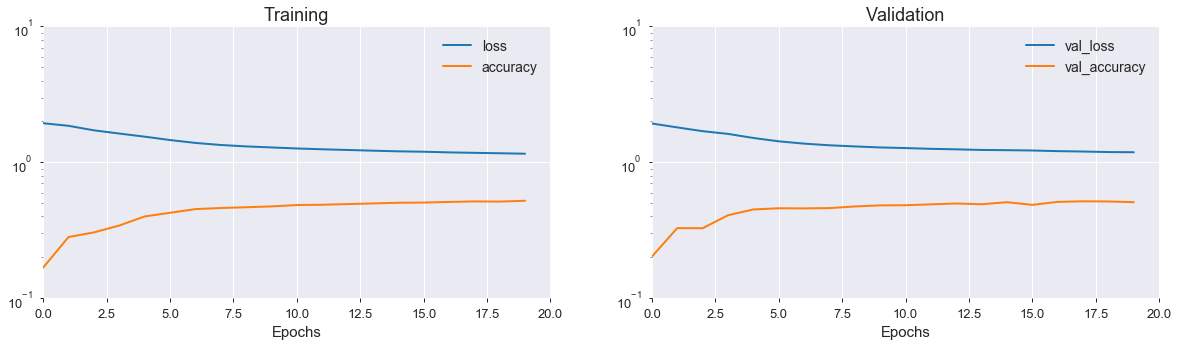

In [13]:
#plot_network_learning_graphs(history)
plot_CNN_learning(CNN1)

#### Results

In [14]:
y_predict_val=model.predict([X1_test,X2_test])
y_predict=[]
for elements in y_predict_val:
    y_predict.append(np.argmax(elements))
y_predict=np.array(y_predict)

y_test=df_test[['target']]
y_test=to_categorical(y_test)

To evaluate how good was the classification let's see the [Classification report](https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html) 

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test.argmax(1), y_predict))

              precision    recall  f1-score   support

           0       0.92      0.70      0.79       439
           1       0.33      0.12      0.18       439
           2       0.41      0.35      0.38       440
           3       0.59      0.85      0.70       440
           4       0.45      0.71      0.55       440
           5       0.36      0.51      0.42       440
           6       0.54      0.32      0.40       440

    accuracy                           0.51      3078
   macro avg       0.52      0.51      0.49      3078
weighted avg       0.52      0.51      0.49      3078



Finally, let's have a look at the [Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix) 

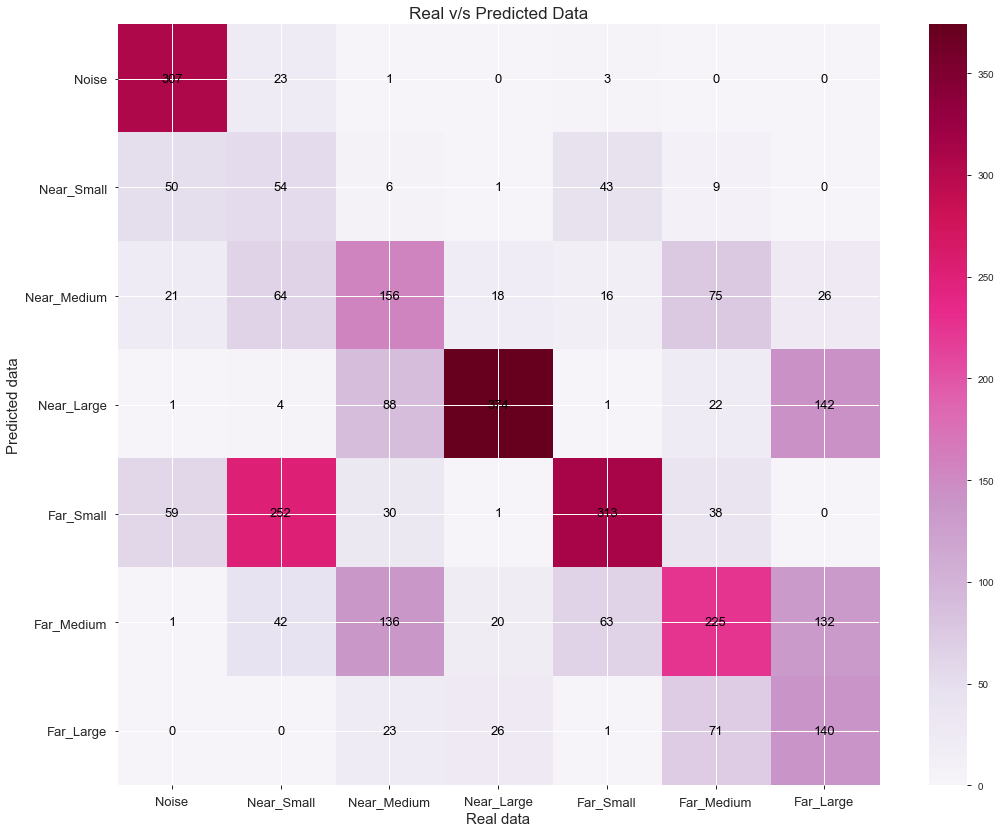

In [16]:
plot_confustion_matrix(y_test.argmax(1), y_predict, df_train, prob=False)

# III. Fully Conneceted Model

Now we will explore the performance of a fully connected CNN

In [17]:
def FC_CNN(input_len, input_width):
    n_filters = 30
    kernel_size = 10
    
    input_seq = Input(shape=(input_len, input_width) )
    
    convolved = Conv1D( n_filters, kernel_size,  activation="relu")(input_seq)
    convolved = Conv1D( n_filters, kernel_size,  activation="relu")(convolved)
    convolved = Conv1D( n_filters, kernel_size,  activation="relu")(convolved)
    drop = Dropout(0.5)(convolved)
    processed = MaxPooling1D(pool_size=50)(convolved)
    
    flat = Flatten()(processed)
    
    compressed = Dense(250, activation="relu")(flat)
    output = Dense(7, activation='softmax')(compressed) 
    
    model = Model(inputs=input_seq, outputs=output)                   
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'] )
    
    return model

In [18]:
model = FC_CNN(6000,3)

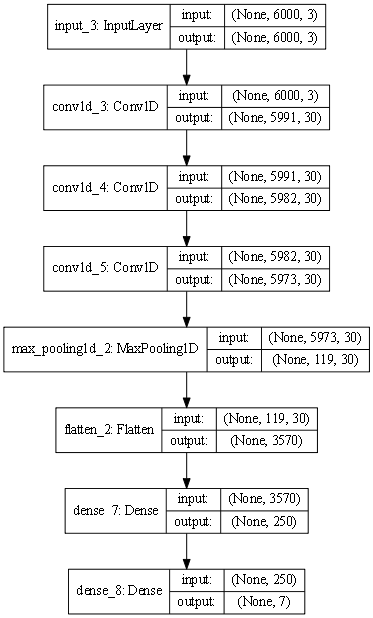

In [19]:
plot_model(model,dpi=70, show_shapes=True)

This time there is no need to separate the numerical and time series piece 

In [20]:
# training data
series_train = df_train[["E" , "N", "Z"]].to_numpy()
X_train = np.array([ np.stack(item).T for item in series_train ])
print('X_train shape: ', X_train.shape)

y_train = df_train[ ["target"]].to_numpy()
y_train = to_categorical(y_train)
print('y_train shape: ',y_train.shape)

# test data
series_test = df_test[["E" , "N", "Z"]].to_numpy()
X_test= np.array([ np.stack(item).T for item in series_test ])
print('X_test shape: ', X_test.shape)

y_test = df_test[ ["target"]].to_numpy()
y_test = to_categorical(y_test)
print('y_test shape: ',y_test.shape)

X_train shape:  (12308, 6000, 3)
y_train shape:  (12308, 7)
X_test shape:  (3078, 6000, 3)
y_test shape:  (3078, 7)


Let's also implement a callback and an object to save the data of the training

In [21]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

earlyStopping = EarlyStopping(monitor='loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='loss', mode='min')


In [22]:
CNN2= model.fit(X_train, y_train, epochs=20, batch_size = 50, verbose=2,
                    callbacks=[earlyStopping,mcp_save],validation_data=(X_test, y_test))

Train on 12308 samples, validate on 3078 samples
Epoch 1/20
 - 1240s - loss: 1281.4529 - accuracy: 0.2779 - val_loss: 708.8127 - val_accuracy: 0.3467
Epoch 2/20
 - 1258s - loss: 422.0433 - accuracy: 0.3945 - val_loss: 315.6680 - val_accuracy: 0.4425
Epoch 3/20
 - 1232s - loss: 479.0110 - accuracy: 0.4001 - val_loss: 530.0337 - val_accuracy: 0.4214
Epoch 4/20
 - 1234s - loss: 253.0321 - accuracy: 0.4281 - val_loss: 307.1341 - val_accuracy: 0.4662
Epoch 5/20
 - 1238s - loss: 129.5053 - accuracy: 0.4340 - val_loss: 299.3994 - val_accuracy: 0.4548
Epoch 6/20
 - 1233s - loss: 165.7632 - accuracy: 0.4568 - val_loss: 237.7396 - val_accuracy: 0.4516
Epoch 7/20
 - 1349s - loss: 153.7233 - accuracy: 0.4387 - val_loss: 339.0879 - val_accuracy: 0.4363
Epoch 8/20
 - 1233s - loss: 94.9706 - accuracy: 0.4753 - val_loss: 243.7605 - val_accuracy: 0.4682
Epoch 9/20
 - 1231s - loss: 52.4513 - accuracy: 0.4680 - val_loss: 220.7664 - val_accuracy: 0.4838
Epoch 10/20
 - 1235s - loss: 54.3673 - accuracy: 0.5

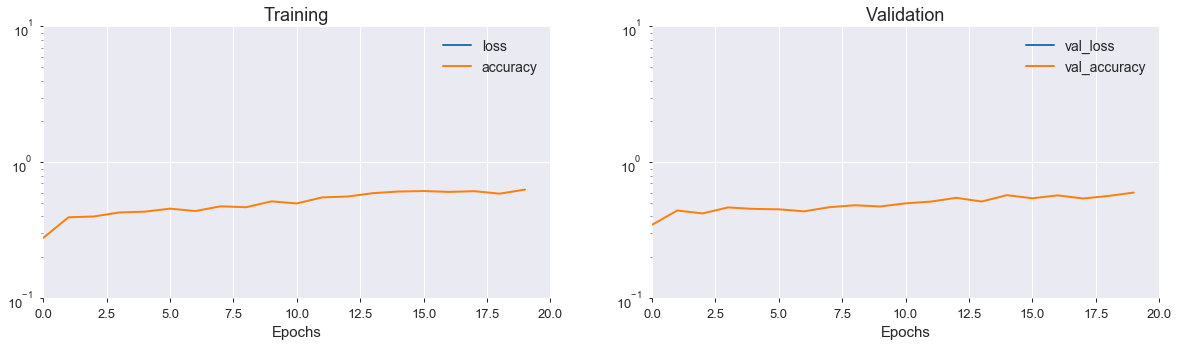

In [23]:
plot_CNN_learning(CNN2)

#### Results

In [24]:
y_pred = model.predict(X_test)

y_predict=[]
for elements in y_pred:
    y_predict.append(np.argmax(elements))

In [25]:
print(classification_report(y_test.argmax(1), y_predict))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       439
           1       0.61      0.53      0.57       439
           2       0.42      0.49      0.45       440
           3       0.57      0.70      0.63       440
           4       0.64      0.51      0.57       440
           5       0.48      0.29      0.37       440
           6       0.60      0.71      0.65       440

    accuracy                           0.60      3078
   macro avg       0.60      0.60      0.59      3078
weighted avg       0.60      0.60      0.59      3078



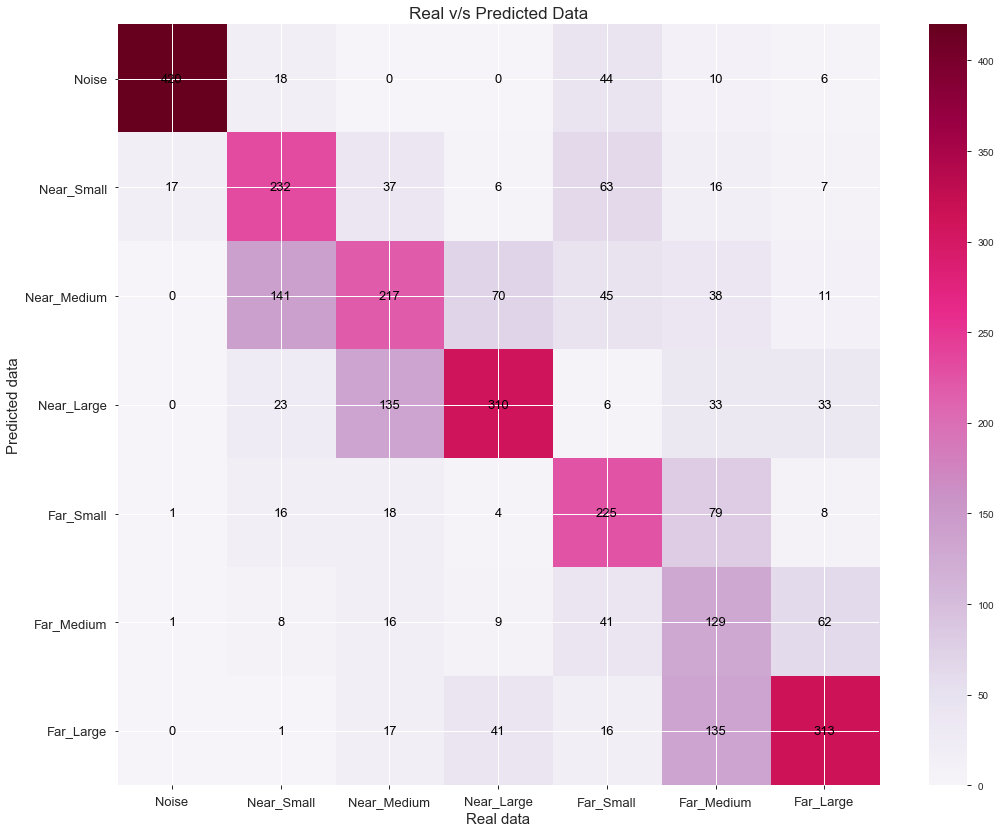

In [26]:
plot_confustion_matrix(y_test.argmax(1), y_predict, df_train, prob=False)

####  <font color='darkred'> We have obtained that at leat for the 20 epochs of training, the merged model offers a great accuracy (and less training time).</font>

#### <font color='darkred'> Both models would improve its performance by increasing the training epochs, however a corresponding [hyperparameter tuning](https://cloud.google.com/ai-platform/training/docs/hyperparameter-tuning-overview) is needed in both cases.</font>